<a href="https://colab.research.google.com/github/EmilSeyfullayev/Bank_Loan_Default_prediction/blob/master/in_Python/h2o_auto_ml_after_vif_p_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!apt-get install default-jre
!java -version
!pip install h2o

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
openjdk version "11.0.8" 2020-07-14
OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1)
OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)


In [27]:
import h2o
h2o.init()
from h2o.automl import H2OAutoML

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.8" 2020-07-14; OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp6t4ctqsr
  JVM stdout: /tmp/tmp6t4ctqsr/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp6t4ctqsr/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.2
H2O_cluster_version_age:,17 hours and 2 minutes
H2O_cluster_name:,H2O_from_python_unknownUser_6wwgjh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [28]:
df = h2o.import_file('/content/drive/My Drive/Colab Notebooks/Credit Risk Modeling/df_vif_p_1000.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [29]:
y = 'loan_status'
x = df.columns
x.remove('loan_status')
x.remove('C1')

In [30]:
df_train, df_test, df_validation = df.split_frame([.7, .15])

In [31]:
df_train[y] = df_train[y].asfactor()
df_test[y] = df_test[y].asfactor()
df_validation[y] = df_validation[y].asfactor()

In [32]:
aml = H2OAutoML(
    nfolds=5,
    #balance_classes=True,
    max_runtime_secs=480,
    seed=42,
    stopping_metric="AUC"
)

In [33]:
aml.train(x,y,training_frame=df_train, validation_frame=df_validation, leaderboard_frame=df_validation)

AutoML progress: |
11:53:58.43: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

████████████████████████████████████████████████████████| 100%


In [35]:
aml.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20200904_115358,0.851396,0.481526,0.849993,0.234153,0.397427,0.157948
StackedEnsemble_BestOfFamily_AutoML_20200904_115358,0.8495,0.486783,0.843246,0.235497,0.399013,0.159212
GBM_2_AutoML_20200904_115358,0.848286,0.495177,0.84218,0.225017,0.402141,0.161717
GBM_grid__1_AutoML_20200904_115358_model_4,0.845785,0.501844,0.839585,0.236817,0.406252,0.16504
GBM_3_AutoML_20200904_115358,0.844056,0.494633,0.839242,0.263706,0.403365,0.162703
GBM_1_AutoML_20200904_115358,0.843178,0.500058,0.839475,0.233568,0.404408,0.163546
GBM_4_AutoML_20200904_115358,0.842792,0.492278,0.838644,0.246594,0.402907,0.162334
XGBoost_3_AutoML_20200904_115358,0.842484,0.493413,0.836138,0.237473,0.402714,0.162179
XGBoost_grid__1_AutoML_20200904_115358_model_6,0.84173,0.496054,0.830625,0.227017,0.403093,0.162484
GBM_grid__1_AutoML_20200904_115358_model_2,0.840593,0.516353,0.833514,0.25188,0.412096,0.169823


In [36]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20200904_115358

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.08674910941758439
RMSE: 0.29453201764423576
LogLoss: 0.30902776407856253
Null degrees of freedom: 6998
Residual degrees of freedom: 6983
Null deviance: 9702.672947580086
Residual deviance: 4325.770641571718
AIC: 4357.770641571718
AUC: 0.968200623557853
AUCPR: 0.9701919596766209
Gini: 0.9364012471157059

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3937508068013243: 


,,0,1,Error,Rate
0,0,2868.0,633.0,0.1808,(633.0/3501.0)
1,1,194.0,3304.0,0.0555,(194.0/3498.0)
2,Total,3062.0,3937.0,0.1182,(827.0/6999.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.393751,0.888769,237.0
1,max f2,0.288488,0.937618,279.0
2,max f0point5,0.707926,0.921784,119.0
3,max accuracy,0.575788,0.884698,169.0
4,max precision,0.933377,1.000000,0.0
5,max recall,0.163924,1.000000,337.0
6,max specificity,0.933377,1.000000,0.0
7,max absolute_mcc,0.575788,0.772603,169.0
8,max min_per_class_accuracy,0.492814,0.880320,199.0
9,max mean_per_class_accuracy,0.575788,0.884678,169.0



Gains/Lift Table: Avg response rate: 49.98 %, avg score: 49.79 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010001,0.922869,2.000858,2.000858,1.000000,0.927850,1.000000,0.927850,0.020011,0.020011,100.085763,100.085763,0.020011
1,2,0.020003,0.918080,2.000858,2.000858,1.000000,0.920145,1.000000,0.923998,0.020011,0.040023,100.085763,100.085763,0.040023
2,3,0.030004,0.914225,2.000858,2.000858,1.000000,0.916063,1.000000,0.921353,0.020011,0.060034,100.085763,100.085763,0.060034
3,4,0.040006,0.910751,2.000858,2.000858,1.000000,0.912541,1.000000,0.919150,0.020011,0.080046,100.085763,100.085763,0.080046
4,5,0.050007,0.907429,2.000858,2.000858,1.000000,0.908940,1.000000,0.917108,0.020011,0.100057,100.085763,100.085763,0.100057
5,6,0.100014,0.888373,2.000858,2.000858,1.000000,0.898204,1.000000,0.907656,0.100057,0.200114,100.085763,100.085763,0.200114
6,7,0.150021,0.868816,2.000858,2.000858,1.000000,0.879251,1.000000,0.898187,0.100057,0.300172,100.085763,100.085763,0.300172
7,8,0.200029,0.847450,2.000858,2.000858,1.000000,0.858593,1.000000,0.888289,0.100057,0.400229,100.085763,100.085763,0.400229
8,9,0.300043,0.789352,1.997999,1.999905,0.998571,0.821287,0.999524,0.865955,0.199828,0.600057,99.799926,99.990484,0.599772
9,10,0.400057,0.669938,1.720738,1.930113,0.860000,0.738223,0.964643,0.834022,0.172098,0.772156,72.073756,93.011302,0.743878




ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.1579483530873979
RMSE: 0.39742716702233366
LogLoss: 0.4815260878064106
Null degrees of freedom: 1514
Residual degrees of freedom: 1499
Null deviance: 2100.2336636453583
Residual deviance: 1459.0240460534242
AIC: 1491.0240460534242
AUC: 0.8513961213236576
AUCPR: 0.8499934436978211
Gini: 0.7027922426473152

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.390569075926545: 


,,0,1,Error,Rate
0,0,516.0,243.0,0.3202,(243.0/759.0)
1,1,112.0,644.0,0.1481,(112.0/756.0)
2,Total,628.0,887.0,0.2343,(355.0/1515.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.390569,0.783932,245.0
1,max f2,0.136576,0.865052,356.0
2,max f0point5,0.635324,0.787377,151.0
3,max accuracy,0.594773,0.770957,168.0
4,max precision,0.939906,1.000000,0.0
5,max recall,0.091948,1.000000,376.0
6,max specificity,0.939906,1.000000,0.0
7,max absolute_mcc,0.594773,0.545419,168.0
8,max min_per_class_accuracy,0.506025,0.763228,200.0
9,max mean_per_class_accuracy,0.594773,0.770842,168.0



Gains/Lift Table: Avg response rate: 49.90 %, avg score: 49.87 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010561,0.921163,2.003968,2.003968,1.000000,0.927426,1.000000,0.927426,0.021164,0.021164,100.396825,100.396825,0.021164
1,2,0.020462,0.913921,2.003968,2.003968,1.000000,0.916278,1.000000,0.922032,0.019841,0.041005,100.396825,100.396825,0.041005
2,3,0.030363,0.908356,2.003968,2.003968,1.000000,0.910437,1.000000,0.918251,0.019841,0.060847,100.396825,100.396825,0.060847
3,4,0.040264,0.901769,2.003968,2.003968,1.000000,0.905026,1.000000,0.914999,0.019841,0.080688,100.396825,100.396825,0.080688
4,5,0.050165,0.896973,2.003968,2.003968,1.000000,0.899554,1.000000,0.911950,0.019841,0.100529,100.396825,100.396825,0.100529
5,6,0.100330,0.865551,1.819392,1.911680,0.907895,0.881496,0.953947,0.896723,0.091270,0.191799,81.939223,91.168024,0.182576
6,7,0.150495,0.836215,1.766656,1.863339,0.881579,0.850732,0.929825,0.881393,0.088624,0.280423,76.665622,86.333890,0.259343
7,8,0.200000,0.806098,1.710053,1.825397,0.853333,0.820501,0.910891,0.866320,0.084656,0.365079,71.005291,82.539683,0.329506
8,9,0.300330,0.749536,1.542528,1.730900,0.769737,0.780015,0.863736,0.837489,0.154762,0.519841,54.252820,73.090005,0.438155
9,10,0.400000,0.648361,1.420030,1.653439,0.708609,0.698865,0.825083,0.802947,0.141534,0.661376,42.003048,65.343915,0.521718




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.16575523286881835
RMSE: 0.40713048629256243
LogLoss: 0.5013458475532993
Null degrees of freedom: 6998
Residual degrees of freedom: 6985
Null deviance: 9704.72922196333
Residual deviance: 7017.839174051083
AIC: 7045.839174051083
AUC: 0.8358379677194249
AUCPR: 0.8294535364293923
Gini: 0.6716759354388497

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35630441575311417: 


,,0,1,Error,Rate
0,0,2265.0,1236.0,0.353,(1236.0/3501.0)
1,1,516.0,2982.0,0.1475,(516.0/3498.0)
2,Total,2781.0,4218.0,0.2503,(1752.0/6999.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.356304,0.772939,253.0
1,max f2,0.138219,0.863370,354.0
2,max f0point5,0.596301,0.767120,161.0
3,max accuracy,0.469671,0.762395,211.0
4,max precision,0.932603,1.000000,0.0
5,max recall,0.084813,1.000000,384.0
6,max specificity,0.932603,1.000000,0.0
7,max absolute_mcc,0.469671,0.525503,211.0
8,max min_per_class_accuracy,0.513586,0.760435,195.0
9,max mean_per_class_accuracy,0.469671,0.762406,211.0



Gains/Lift Table: Avg response rate: 49.98 %, avg score: 49.99 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010001,0.916366,1.972274,1.972274,0.985714,0.921975,0.985714,0.921975,0.019726,0.019726,97.227395,97.227395,0.019440
1,2,0.020003,0.910568,2.000858,1.986566,1.000000,0.913010,0.992857,0.917492,0.020011,0.039737,100.085763,98.656579,0.039451
2,3,0.030004,0.905751,1.915107,1.962746,0.957143,0.908003,0.980952,0.914329,0.019154,0.058891,91.510659,96.274606,0.057748
3,4,0.040006,0.900782,1.943690,1.957982,0.971429,0.903295,0.978571,0.911571,0.019440,0.078330,94.369027,95.798211,0.076617
4,5,0.050007,0.896164,1.886523,1.943690,0.942857,0.898325,0.971429,0.908921,0.018868,0.097198,88.652291,94.369027,0.094342
5,6,0.100014,0.870293,1.789338,1.866514,0.894286,0.883353,0.932857,0.896137,0.089480,0.186678,78.933840,86.651433,0.173253
6,7,0.150021,0.846146,1.726454,1.819828,0.862857,0.858300,0.909524,0.883525,0.086335,0.273013,72.645430,81.982766,0.245878
7,8,0.200029,0.819342,1.652137,1.777905,0.825714,0.832702,0.888571,0.870819,0.082619,0.355632,65.213673,77.790493,0.311073
8,9,0.300043,0.751460,1.463484,1.673098,0.731429,0.788114,0.836190,0.843251,0.146369,0.502001,46.348444,67.309810,0.403744
9,10,0.400057,0.662097,1.394884,1.603544,0.697143,0.708869,0.801429,0.809655,0.139508,0.641509,39.488361,60.354447,0.482698


In [37]:
h2o.save_model(aml.leader, path="/content/drive/My Drive/Colab Notebooks/Credit Risk Modeling/h2o_aml")

'/content/drive/My Drive/Colab Notebooks/Credit Risk Modeling/h2o_aml/StackedEnsemble_AllModels_AutoML_20200904_115358'

In [40]:
aml.leader.confusion_matrix()
#Optimal treshold for cross validation data is 0.35


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3937508068013243: 


,,0,1,Error,Rate
0,0,2868.0,633.0,0.1808,(633.0/3501.0)
1,1,194.0,3304.0,0.0555,(194.0/3498.0)
2,Total,3062.0,3937.0,0.1182,(827.0/6999.0)


In [51]:
performance = aml.leader.model_performance(df_test)

In [63]:
performance.auc()

0.8431662560684008

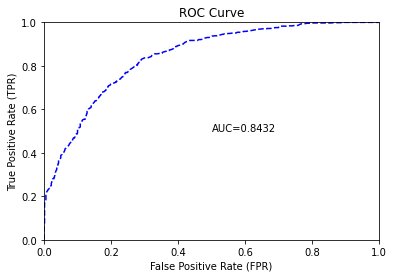

In [66]:
performance.plot(type='roc')